<a href="https://colab.research.google.com/github/404himel/CNN/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 21.8MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

valid_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize, all pixels value between 0 to 1.for better learning
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#model compile

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
histroy = model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 90ms/step - accuracy: 0.5348 - loss: 3.2544 - val_accuracy: 0.6440 - val_loss: 0.6501
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6237 - loss: 0.6501 - val_accuracy: 0.6958 - val_loss: 0.5981
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.6982 - loss: 0.5780 - val_accuracy: 0.7608 - val_loss: 0.5172
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7465 - loss: 0.5122 - val_accuracy: 0.7652 - val_loss: 0.5020
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7868 - loss: 0.4506 - val_accuracy: 0.7986 - val_loss: 0.4432
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8137 - loss: 0.4101 - val_accuracy: 0.7978 - val_loss: 0.4413
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8278 - loss: 0.3737 - val_accuracy: 0.7484 - val_loss: 0.4963
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8556 - loss: 0.3243 - 

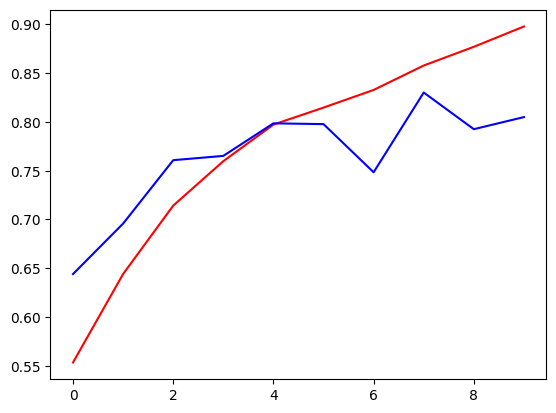

In [ ]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['accuracy'],color='red',label='train')
plt.plot(histroy.history['val_accuracy'],color='blue',label='validation')
plt.show()

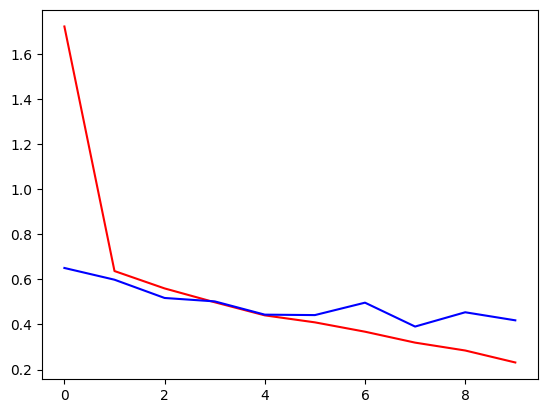

In [ ]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['loss'],color='red',label='train')
plt.plot(histroy.history['val_loss'],color='blue',label='validation')
plt.show()

In [ ]:
# ways to reduce overfitting
# add more data
#data augmentation
#L1/L2 Regularizer
#Dropout
#Batch Normalization
#Reduce complexity

# for Batch Normalization add a layer [model.add(BatchNormalization())] between each conv and pooling layer and add [model.add(Dropout(0.3))] at after dense layer

In [ ]:
import cv2

In [ ]:
test_1 = cv2.imread('/content/cat_1.png')

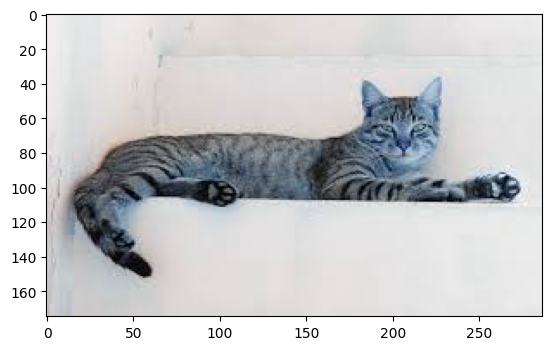

In [ ]:
plt.imshow(test_1)

In [ ]:
test_1.shape

(175, 287, 3)

In [ ]:
test_1 = cv2.resize(test_1,(256,256))

In [ ]:
test_input = test_1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[6.206612e-37]], dtype=float32)